In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/forest-cover-type-prediction/train.csv")

In [3]:
train_data.shape

(15120, 56)

In [4]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
train_data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [6]:
train_data.info

<bound method DataFrame.info of           Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Dista

In [7]:
train_data.describe(include='all')

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
cover_type = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}

train_data['Cover_Type'] = train_data['Cover_Type'].map(cover_type)

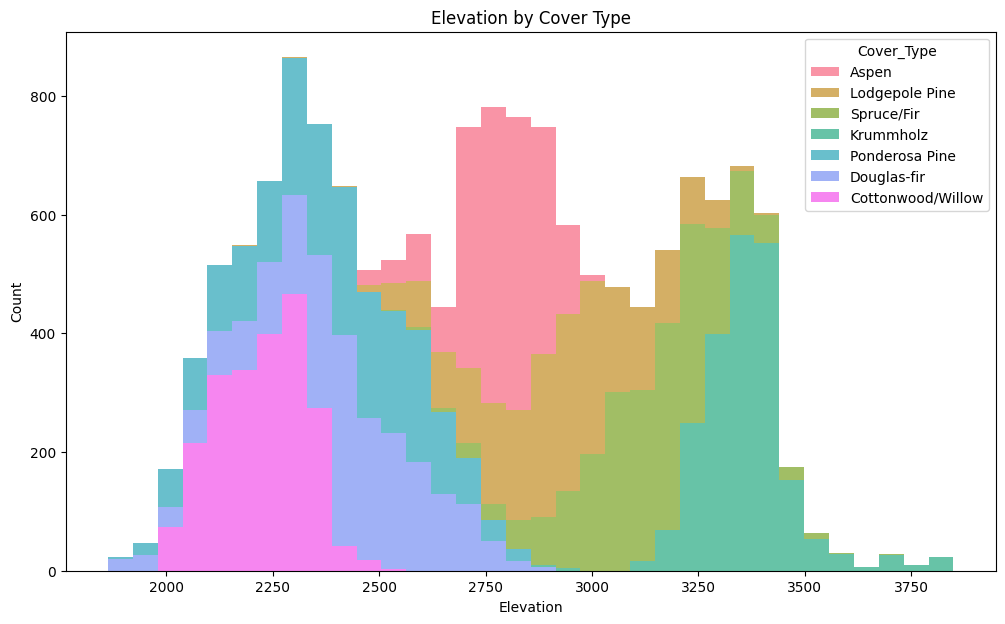

In [9]:
plt.figure(figsize=(12, 7))
sns.histplot(data=train_data, x="Elevation", hue="Cover_Type", multiple="stack", palette="husl", linewidth=0)
plt.title("Elevation by Cover Type")
plt.show()

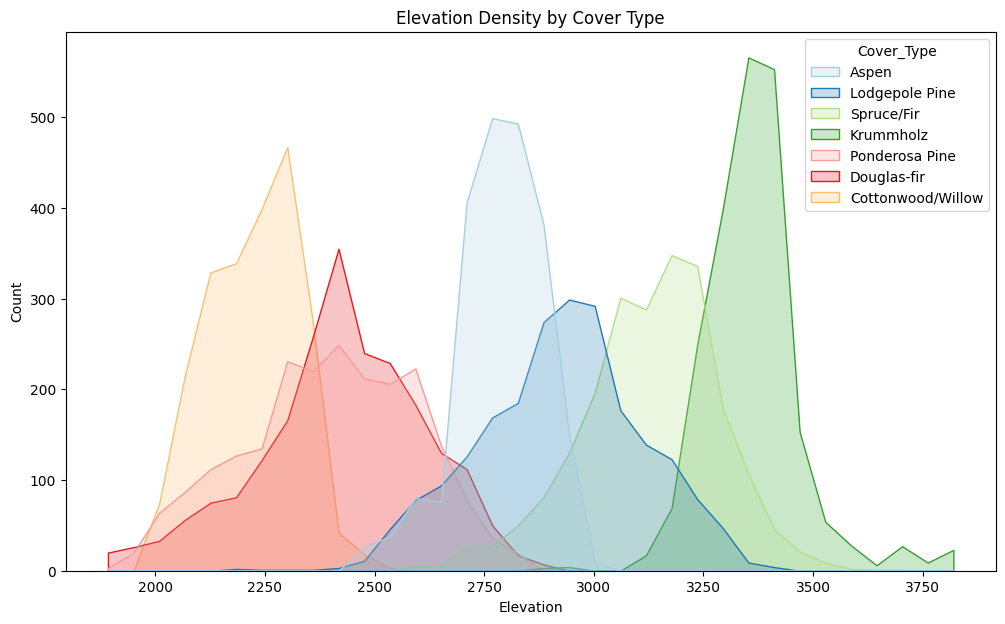

In [10]:
plt.figure(figsize=(12, 7))
sns.histplot(train_data, x="Elevation", hue="Cover_Type", element="poly", palette="Paired")
plt.title("Elevation Density by Cover Type")
plt.show()

In [11]:
soil_df = train_data.iloc[:, 15:55]
soil_df_encoded = pd.DataFrame(soil_df)
train_data['Soil_Types'] = soil_df_encoded.idxmax(axis=1)
train_data['Soil_Types'] = train_data['Soil_Types'].str.replace('Soil_Type','')

WildernessArea_df = train_data.iloc[:, 11:15]
WildernessArea_df_encoded = pd.DataFrame(WildernessArea_df)
train_data['Wilderness_Area'] = WildernessArea_df_encoded.idxmax(axis=1)
train_data['Wilderness_Area'] = train_data['Wilderness_Area'].str.replace('Wilderness_Area','')

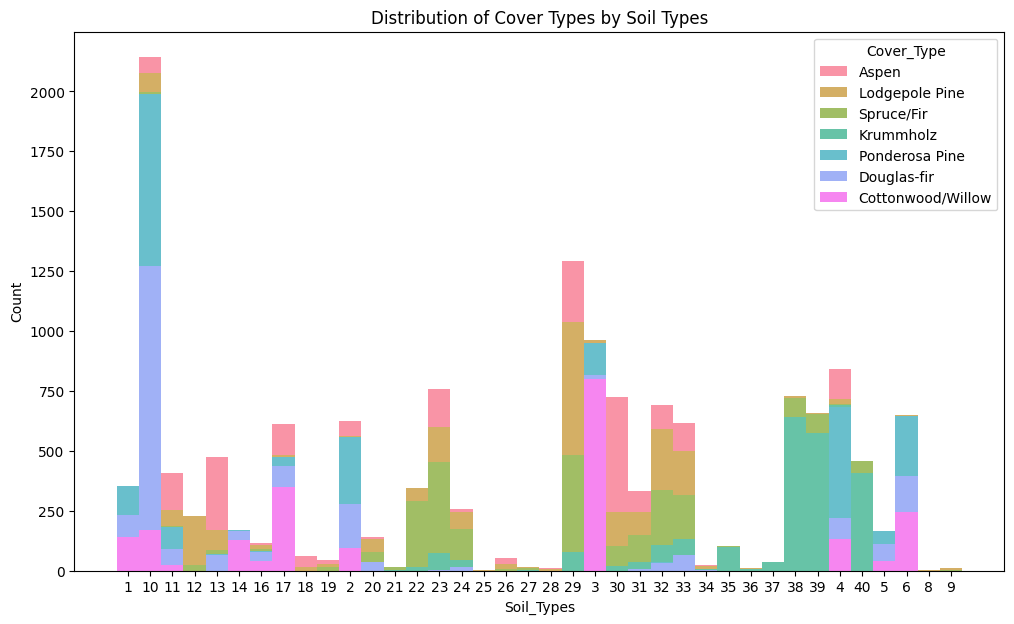

In [12]:
sorted_soil_order = sorted(train_data['Soil_Types'].unique())
train_data['Soil_Types'] = pd.Categorical(train_data['Soil_Types'], categories=sorted_soil_order, ordered=True)

plt.figure(figsize=(12, 7))
sns.histplot(data=train_data, x="Soil_Types", hue="Cover_Type", multiple="stack", palette="husl", linewidth=0)
plt.title('Distribution of Cover Types by Soil Types')
plt.show()

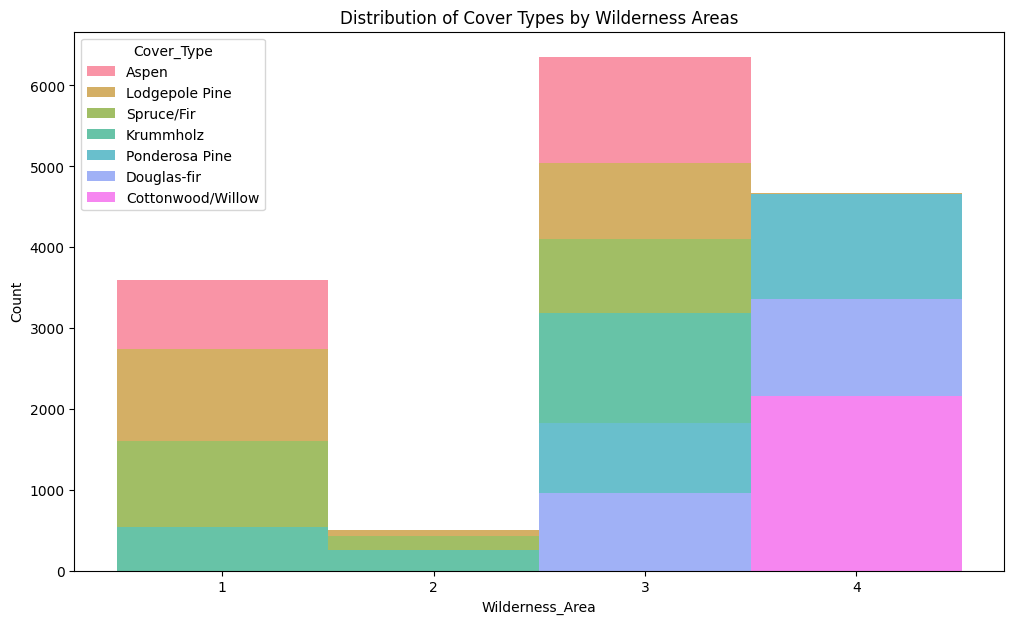

In [13]:
sorted_wilderness_order = sorted(train_data['Wilderness_Area'].unique())
train_data['Wilderness_Area'] = pd.Categorical(train_data['Wilderness_Area'], categories=sorted_wilderness_order, ordered=True)

plt.figure(figsize=(12, 7))
sns.histplot(data=train_data, x="Wilderness_Area", hue="Cover_Type", multiple="stack", palette="husl", linewidth=0)
plt.title('Distribution of Cover Types by Wilderness Areas')
plt.show()

In [14]:
fig = px.scatter_3d(train_data, x='Hillshade_9am', y='Hillshade_Noon', z='Hillshade_3pm',
                    color='Cover_Type', opacity=0.7)
fig.update_layout(
    title='Hillshade at 9am, Noon and 3pm',
    width=1000,
    height=800,
)
fig.show()

In [15]:
fig = px.scatter_3d(train_data, x='Elevation', y='Slope', z='Hillshade_9am',
                    color='Cover_Type', opacity=0.7)
fig.update_layout(
    title='Elevation, Slope, and Hillshade at 9am',
    width=1000,
    height=800,
)
fig.show()

In [16]:
fig = px.scatter_3d(train_data, x='Elevation', y='Slope', z='Hillshade_Noon',
                    color='Cover_Type', opacity=0.7)
fig.update_layout(
    title='Elevation, Slope, and Hillshade at Noon',
    width=1000,
    height=800,
)
fig.show()

In [17]:
fig = px.scatter_3d(train_data, x='Elevation', y='Slope', z='Hillshade_3pm',
                    color='Cover_Type', opacity=0.7)
fig.update_layout(
    title='Elevation, Slope, and Hillshade at 3pm',
    width=1000,
    height=800,
)
fig.show()